# Dinamika konstrukcija
## Vježbe 3: Matrične operacije u programskome jeziku Python, problem svojstvenih vrijednosti kod oscilacija sistema s više stupnjeva slobode
### Sveučilišni diplomski - Ljetni semestar akademske godine 2020/2021

Predavač: Ivan Hlača;
email: ivan.hlaca@uniri.hr;
soba G-338

### Matrične operacije

Da bi se dobio matrični zapis potrebno je definirati listu u listi (eng. nested list). 

In [1]:
Ma = [[5,2],
     [7,-1],
     [1,-5]]
Mb = [[2,3,1,4],
      [2,-2,4,0]]
Ma

[[5, 2], [7, -1], [1, -5]]

In [2]:
len(Ma) #broj redova matrice A

3

In [3]:
len(Ma[0]) #broj stupaca matrice A

2

Gornji zapis matrica preko liste u listi nije posebno praktičan za čitanje, matrice A i B su:
$$M_a=
\begin{bmatrix}
5 & 2\\
7 & -1\\
1 & -5
\end{bmatrix}$$
$$M_b=
\begin{bmatrix}
2 & 3 & 1 & 4\\
2 & -2 & 4 & 0
\end{bmatrix}$$

Funkcijom se može definirati množenje dvije matrice. $$M_c = M_a \times M_b$$

#### Množenje matrica

In [4]:
Mc = [[0,0,0,0],
      [0,0,0,0],
      [0,0,0,0]] #matrica C je inicijalizirana
redovi_A = len(Ma)
stupci_A = len(Ma[0])
redovi_B = len(Mb)
stupci_B = len(Mb[0])

for i in range(redovi_A): 
    for j in range(stupci_B): 
        for k in range(redovi_B):
            Mc[i][j] += Ma[i][k] * Mb[k][j] #mnozenje matrica

Mc

[[14, 11, 13, 20], [12, 23, 3, 28], [-8, 13, -19, 4]]

Ukoliko se dimenzije matrice C ne pripreme prema pravilima matričnog množenja onda program neće raditi i prikazati će se poruka: "IndexError: list index out of range". Inicijalizirati se može za broj stupaca i redaka koji ovisi o dimenzijama matrica A i B čime se generalizira postupak.

In [5]:
[0 for stupac in range(4)] #list comprehension sintaksa

[0, 0, 0, 0]

In [6]:
 [[0 for stupac in range(4)] for red in range(3)] #list comprehension sintaksa

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [7]:
br_stupaca=4
br_redaka=3
inicijalizacija= [[0 for stupac in range(br_stupaca)] for red in range(br_redaka)]
inicijalizacija == [[0,0,0,0],
                    [0,0,0,0],
                    [0,0,0,0]] #potvrda jednakosti

True

In [8]:
def matricno_mnozenje(A,B):
    redovi_A = len(A)
    stupci_A = len(A[0])
    redovi_B = len(B)
    stupci_B = len(B[0])
    if stupci_A != redovi_B:
        print("Matrice se ne mogu pomnoziti jer dimenzije ne odgovaraju.")
        return
    C = [[0 for stupac in range(stupci_B)] for red in range(redovi_A)]
    for i in range(redovi_A):
        for j in range(stupci_B):
            for k in range(redovi_B):                
                C[i][j] += A[i][k] * B[k][j]
    return C

matricno_mnozenje(Ma,Mb)

[[14, 11, 13, 20], [12, 23, 3, 28], [-8, 13, -19, 4]]

Kontrola Numpy modulom pomoću naredbe *matmul* (matrix multiplication) ili kraće *dot*. Funkcija *matricno_mnozenje* i *np.matmul* (ili *np.dot*) rade istu stvar te i jedna i druga funkcija može raditi na listama u listi (tj. nested listi) te na numpy array-u.   
Definirati će se matrice $M_a$ i $M_b$ kao Numpy array tip podataka, npr. matrica Ma će se sada zvati M_a.

In [9]:
import numpy as np
M_a = np.array(Ma)
M_b = np.array(Mb)
M_c = np.dot(M_a,M_b)
M_c

array([[ 14,  11,  13,  20],
       [ 12,  23,   3,  28],
       [ -8,  13, -19,   4]])

In [10]:
M_c.shape

(3, 4)

In [11]:
M_c[0,1] #razlika u sintaksi kod slicinga [][] -> [,]

11

#### Transponiranje matrica   

Transponiranje matrice je operacija koji matricu okreće oko njene glavne dijagonale. U nastavku je funkcija koja izvodi transponiranje zamjenom indeksa tzv. nested liste.

$A → A^T$    
$a_{i,j} → a_{j,i}$

In [12]:
def transpo(matrica):
    br_redova = len(matrica)
    br_stupaca = len(matrica[0])
    matrica_T = [[0 for stupac in range(br_redova)] for red in range(br_stupaca)]
    for i in range(br_redova):
        for j in range(br_stupaca):
            matrica_T[j][i] = matrica[i][j]
    return matrica_T

In [13]:
transpo(Ma)

[[5, 7, 1], [2, -1, -5]]

Numpy modul ima naredbu za transponiranje *transpose* ili skraćeno *T*.

In [14]:
M_a.T

array([[ 5,  7,  1],
       [ 2, -1, -5]])

#### Determinanta matrice

Determinanta se može tražiti samo za matrice s jednakim brojem stupaca i redaka. tj. kvadratne matrica. 
$$M_d=
\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix}$$
$$ det M_d = 1\cdot4 - 2\cdot3=-2$$

In [15]:
M_d = np.array([[1,2],[3,4]])
d = np.linalg.det(M_d)
d

-2.0000000000000004

#### Inverz matrica

Inverz se može tražiti samo za neke kvadratne matrice odnosno tzv. regularne matrice. Množenjem matrice s vlastitim inverzom se dobije jedinična matrica $I$.

$$ A^{-1} A = I $$

Jedinična matrica ima vrijednosti 1 po glavnoj dijagonali, a izvan ima 0 (ili vrijednosti veoma blizu 0).

In [16]:
M_d_inv = np.linalg.inv(M_d)
np.dot(M_d,M_d_inv)

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

### Problem svojstvenih vrijednosti  kod oscilacija sistema s više stupnjeva slobode

Jednadžba oscilacija slobodnog neprigušenog sistema s **više stupnjeva slobode** je sljedeća:

$$m\ddot{u}+ku=0 \tag{1}$$

a rješenje jednadžbe je:

$$u(t)=q_n(t)\phi_n \tag{2}$$

gdje je $q_n(t)=A_n \cos{\omega_n t}+B_n \sin{\omega_n t}$

Ako se rješenje (2) uvrsti u jednadžbu (1), dobije se sljedeći izraz:

$$[-\omega_n^2 m \phi_n + k \phi_n] q_n(t) = 0 \tag{3}$$

Izraz ima netrivijalno rješenje kada postoji gibanje ili drugim rječima $q_n(t)\neq 0$ iz čega proizlazi da lijevi dio (3) mora biti jednak 0:

$$-\omega_n^2 m \phi_n + k\phi_n = 0  \tag{4}$$

što vrijedi samo u slučaju samo u slučaju kada je determinanta:

$$|-\omega^2*m+k|=0 \tag{5}$$

Takav problem se još zove i problem vlastitih vrijednosti ili *eigenvalue problem*. Prirodne frekvencije $\omega^2_n$ se nazivaju *eigenvalues*.  
Uvrštavanjem prirodnih frekvencija u jednadžbu (4) se dobiju vlastiti oblici (vektori) ili *eigenvectors*.

#### Primjer 1.

Razmatra se primjer Example 10.4 iz knjige Dynamics of Structures (Chopra).

<img src="https://github.com/Ivan768/Dinamika-konstrukcija/blob/main/Primjer_10_4.png">

#### Postupak pomoću modula Sympy - korak po korak

Sympy je modul u Pythonu koji služi za simboličko računanje odnosno računanje s nepoznanicama.   
Postupak u nastavku služi kao podsjetnik na potrebne korake za izračun prirodnih frekvencija i vlastitih oblika. Nije preporučljivo koristiti dani postupak jer je efikasan samo do 3 stupnja slobode.

In [17]:
#ispod su dvije naredbe za pregledniji ispis matematickih izraza (ne mora se koristiti)
from sympy import init_printing
init_printing() 

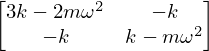

In [18]:
from sympy import * #sintaksa nakon koje se ne mora pisati sympy prije naredbe
omega = Symbol('omega',positive=True)
masa,krutost = symbols('m k',positive=True)
m = masa * np.array([[2,0],[0,1]])
k = krutost * np.array([[3,-1],[-1,1]])
jednadzba = Matrix(-m*omega**2+k)
jednadzba

In [19]:
determinanta = jednadzba.det()
determinanta

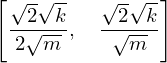

In [20]:
rjesenja = solve(determinanta,omega)
omega_1 = rjesenja[0]
omega_2 = rjesenja[1]
rjesenja

In [21]:
u_1,u_2 = symbols('u_1 u_2')

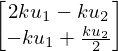

In [22]:
uvjet_1 = jednadzba.subs(omega,omega_1)*Matrix([u_1,u_2]) #uvjet za 1. oblik
uvjet_1

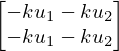

In [23]:
uvjet_2 = jednadzba.subs(omega,omega_2)*Matrix([u_1,u_2]) #uvjet za 2. oblik
uvjet_2

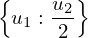

In [24]:
solve(uvjet_1,[u_1,u_2]) #1. oblik

In [25]:
solve(uvjet_2,[u_1,u_2]) #2. oblik

#### Postupak pomoću modula Scipy

Postupak u nastavku je efikasan i za veći broj stupnjeva sloboda. Preporuka je koristiti ovaj postupak. Naredba *eigh*, za razliku od *eig*, daje uvijek realna rješenja.
Materijalni i geometrijski parametri su sljedeći:   

$$m = 50 000 kg $$   

$$h = 4 m $$ 

$$E = 30 x 10^9 N/m^2 $$   

$$I = 10^{-5} m^4 $$   

A krutost je dobivena metodom deformacija (kolegij GS2) i iznosi:   

$$k = 24 E I / h^3$$


In [26]:
from scipy.linalg import eigh

In [27]:
m = 50000.  #proizvoljna numerička vrijednost
h = 4.0   #visina kata -proizvoljna numerička vrijednost
E = 30 * 10**9 #modul elasticnosti -proizvoljna numerička vrijednost
I = 10**(-5) #moment inercije -proizvoljna numerička vrijednost
k = 24*E*I/h**3 #krutost u primjeru

m_matrica = m * np.array([[2,0],[0,1]])
k_matrica = k * np.array([[3,-1],[-1,1]])

w , v = eigh(k_matrica,m_matrica)

Postupak *eigh* daje karakterističnu vrijednost $\lambda$, a obzirom da je $\lambda=\omega^2$ prirodne frekvencije dobijemo kao korijen od varijable w.

In [28]:
omega = np.sqrt(w) #prirodne frekvencije
omega

array([1.06066017, 2.12132034])

In [29]:
v #vlastiti oblici

array([[-0.00182574, -0.00258199],
       [-0.00365148,  0.00258199]])

In [30]:
#normaliziranje vektora da bi se dobila jedinica na poziciji 2
phi_1 = v[:,0]/v[1,0] 
phi_1 #1. oblik

array([0.5, 1. ])

In [31]:
#normaliziranje vektora da bi se dobila jedinica na poziciji 2
phi_2 = v[:,1]/v[1,1]
phi_2 #1. oblik

array([-1.,  1.])

#### Prikaz dobivenih oblika osciliranja

Funkcija za crtanje deformiranih stupova okvira je dana u nastavku.   
NAPOMENA: Nije nuzno razumijeti kod da bi se koristio.

In [32]:
import matplotlib.pyplot as plt

In [33]:
def stupovi_okvira(domena, u_1, u_2):
    """Funkcija sluzi za dobivanje x koordinata stupa deformiranog okvira.
    Domena je numpy array koji se proteže po visini stupa h. Pomaci kata su
    definirani kao u_1 i u_2. Progibna linije grede ili stupa za opterecenje
    koncentriranom silom je krivulja 3. stupnja odnosno kubna funkcija. 
    Kubna funkcija se moze odrediti temeljem 4 tocke (x,y) na kubnoj funkciji. 
    Postupak u nastavku daje koeficijente koef (a,b,c,d) kubne funkcije koja 
    opisuje deformiranje stupa."""
    x1 , y1 = domena[0]             , u_1           
    x2 , y2 = domena[0] + 10**(-5)  , u_1
    x3 , y3 = domena[-1] - 10**(-5) , u_2 
    x4 , y4 = domena[-1]            , u_2
    y = np.array([y1,y2,y3,y4])
    x = np.array([[x1**(3-i),x2**(3-i),x3**(3-i),x4**(3-i)] for i in range(4)]).T
    x_inverz = np.linalg.inv(x)
    koef = np.dot(x_inverz,y)
    return np.poly1d(koef)

U bloku koda u nastavku se mijenjanjem vlastitog vektora (oblika osciliranja) phi_2 u phi_1 može prikazati 1. oblik.

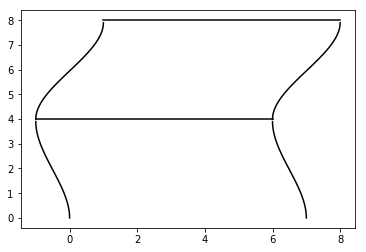

In [34]:
u_0 = 0.0 #pomak temelja

u_1 = phi_2[0] #pomak 1. kata
u_2 = phi_2[1] #pomak 2. kata

L = 7.0   #širina kata
domena_dolje = np.arange(0.0,h,0.1)
domena_gore = domena_dolje + h
f_dolje = stupovi_okvira(domena_dolje,u_0,u_1)
f_gore = stupovi_okvira(domena_gore,u_1,u_2)
plt.plot(f_dolje(domena_dolje),domena_dolje,color="black")  #lijevi stup 1. kata
plt.plot(f_dolje(domena_dolje)+L,domena_dolje,color="black")#lijevi stup 1. kata
plt.plot(f_gore(domena_gore),domena_gore,color="black")   #lijevi stup 2. kata
plt.plot(f_gore(domena_gore)+L,domena_gore,color="black") #lijevi stup 2. kata
plt.plot([u_1,u_1+L],[h,h],color="black") #greda 1. kata
plt.plot([u_2,u_2+L],[2*h,2*h],color="black") #greda 2. kata
plt.show()

#### Rubni uvjeti

Parametri gibanja slobodnog neprigušenog sistema s više stupnjeva slobode se izračunaju uvrštavanjem rubnih uvjeta $u_0$ i $v_0$ u sljedeće jednadžbe:

$$ A_i = \frac{\phi_i^T m u_0} {M_i} = q_n(0) \tag{1}$$
$$ B_i = \frac{\phi_i^T m v_0} {\omega_i M_i} = \dot{q_n}(0) \tag{2}$$

ili isto to u matričnom obliku:

$$ A = M^{-1} \Phi^T m u_0 \tag{3}$$
$$ B = \Omega^{-1} M^{-1} \Phi^T m v_0 \tag{4}$$

gdje je $\Omega$ spektralna matrica, $\Phi$ modalna matrica, a dijagonalna matrica masa $M=\phi^T m \phi$.

#### Primjer 2.

Razmatra se primjer Example 10.11 iz knjige Dynamics of Structures (Chopra) koji se nastavlja na Primjer 1. (Example 10.4).

<img src="https://github.com/Ivan768/Dinamika-konstrukcija/blob/main/Primjer_10_4.png">

Dani su sljedeći rubni uvjeti:
$u(0) = 
\begin{bmatrix}
-0.5 \\
2 
\end{bmatrix}$

In [35]:
u0 = np.array([-0.5,2])
v0 = np.array([0,0]) #brzina nije zadana jer brzine nema v0=0
u0

array([-0.5,  2. ])

In [36]:
#spektralna matrica
spektralna = np.diag(omega) #diag za dijagonalnu matricu
spektralna_inv = np.linalg.inv(spektralna)
spektralna

array([[1.06066017, 0.        ],
       [0.        , 2.12132034]])

In [37]:
#modalna matrica
modalna = np.array([phi_1,phi_2]).T 
#gore je dan postupak za svaki stupanj slobode zasebno
#moze se generalizirati koristenjem varijable v (vlastiti vektor)
modalna

array([[ 0.5, -1. ],
       [ 1. ,  1. ]])

In [38]:
#M_1 = np.dot(phi_1.T,m_matrica).dot(phi_1)
#M_2 = np.dot(phi_2.T,m_matrica).dot(phi_2)
#gore je dan postupak za svaki stupanj slobode zasebno
M = np.dot(modalna.T,m_matrica).dot(modalna)
M_inv = np.linalg.inv(M)
M

array([[7.50000000e+04, 2.18278728e-11],
       [2.18278728e-11, 1.50000000e+05]])

In [39]:
#np.linalg.multi_dot za matricno mnozenje vise matrica
A = np.linalg.multi_dot([ M_inv , modalna.T , m_matrica , u0 ])
A

array([1., 1.])

In [40]:
B = np.linalg.multi_dot([ spektralna_inv , M_inv , modalna.T , m_matrica , v0 ])
B

array([0., 0.])

$q_1(0)=1$ iz rjesenja A[0]   

$q_2(0)=1$ iz rjesenja A[1]   

$\dot{q}_1(0)=0$ iz rjesenja B[0]   

$\dot{q}_2(0)=0$ iz rjesenja B[1]
   
Zadatak će se dovršiti na sljedećim vježbama.